# 不平衡的資料集利用sample_weight矯正
### 程式修改自[Scikit-learn SVM: Weighted samples](https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html#sphx-glr-auto-examples-svm-plot-weighted-samples-py)

## 載入相關套件

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## 生成隨機資料

In [9]:
np.random.seed(0)
# 20筆資料，前10筆+1
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
# y 前10筆為1，後10筆為-1
y = [1] * 10 + [-1] * 10
X, y

(array([[ 2.76405235,  1.40015721],
        [ 1.97873798,  3.2408932 ],
        [ 2.86755799,  0.02272212],
        [ 1.95008842,  0.84864279],
        [ 0.89678115,  1.4105985 ],
        [ 1.14404357,  2.45427351],
        [ 1.76103773,  1.12167502],
        [ 1.44386323,  1.33367433],
        [ 2.49407907,  0.79484174],
        [ 1.3130677 ,  0.14590426],
        [-2.55298982,  0.6536186 ],
        [ 0.8644362 , -0.74216502],
        [ 2.26975462, -1.45436567],
        [ 0.04575852, -0.18718385],
        [ 1.53277921,  1.46935877],
        [ 0.15494743,  0.37816252],
        [-0.88778575, -1.98079647],
        [-0.34791215,  0.15634897],
        [ 1.23029068,  1.20237985],
        [-0.38732682, -0.30230275]]),
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])


# 指定不同權重

In [10]:
# 初始權重為隨機亂數
modified_weight = abs(np.random.randn(len(X)))

# 後5筆權重乘以 5
modified_weight[15:] *= 5
# 第10筆權重乘以 15
modified_weight[9] *= 15
modified_weight

array([1.04855297, 1.42001794, 1.70627019, 1.9507754 , 0.50965218,
       0.4380743 , 1.25279536, 0.77749036, 1.61389785, 3.1911042 ,
       0.89546656, 0.3869025 , 0.51080514, 1.18063218, 0.02818223,
       2.14165935, 0.33258611, 1.51235949, 3.17161047, 1.81370583])

## 無加權的模型訓練

In [11]:
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

SVC(gamma=1)

## 加權的模型訓練

In [12]:
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=modified_weight)

SVC(gamma=1)

## 決策邊界函數

In [13]:
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)

## 繪圖比較兩個模型

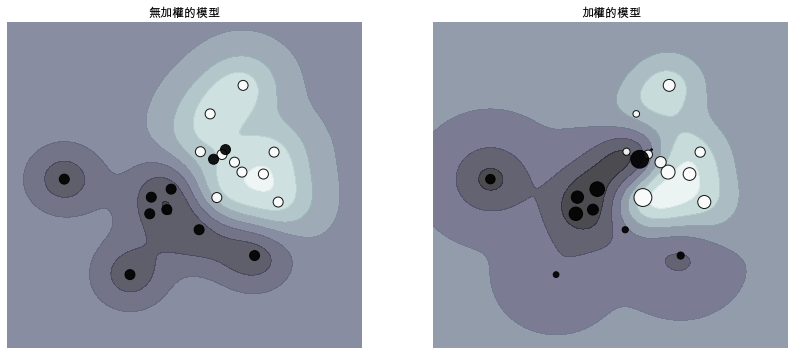

In [15]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 權重全部為 1
constant_weight = np.ones(len(X))
plot_decision_function(
    clf_no_weights, constant_weight, axes[0], "無加權的模型"
)

# 權重全部為 1
plot_decision_function(clf_weights, modified_weight, axes[1], "加權的模型")